The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, you as a data scientist must use your analytical skills to predict the sales of video games depending on given factors. Given are 8 distinguishing factors that can influence the sales of a video game. Your objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a given game.

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-sales-prediction/Test.csv
/kaggle/input/video-games-sales-prediction/Train.csv
/kaggle/input/video-games-sales-prediction/Sample_Submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/video-games-sales-prediction/Train.csv')
test = pd.read_csv('/kaggle/input/video-games-sales-prediction/Test.csv')
sub = pd.read_csv('/kaggle/input/video-games-sales-prediction/Sample_Submission.csv')

In [3]:
train.shape, test.shape, sub.shape

((3506, 9), (1503, 8), (1503, 1))

In [4]:
train.head(5)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [5]:
train.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [6]:
train.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2187
SalesInMillions    3506
dtype: int64

In [7]:
sub.head()

,SalesInMillions
0,1.497533
1,2.368795
2,2.630505
3,2.506086
4,1.970574


# Uni-variate Analysis

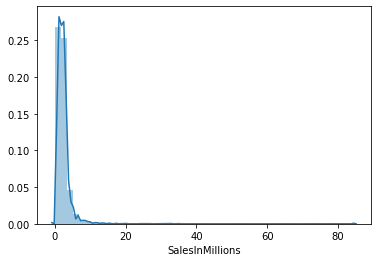

In [8]:
sns.distplot(train['SalesInMillions']);

In [9]:
import matplotlib.style as style
style.available
style.use('bmh')

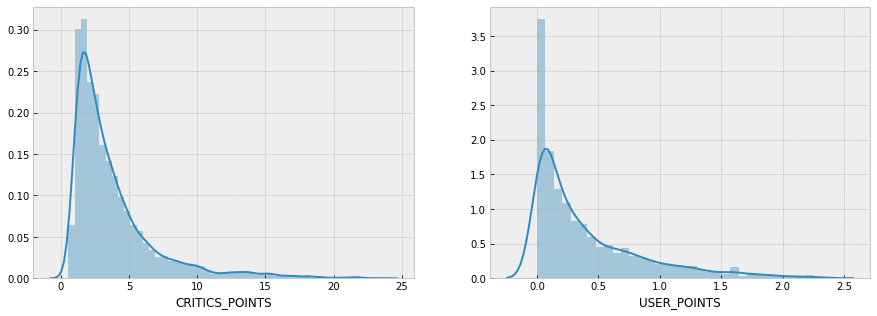

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train['CRITICS_POINTS'], ax=ax1)
sns.distplot(train['USER_POINTS'], ax=ax2);

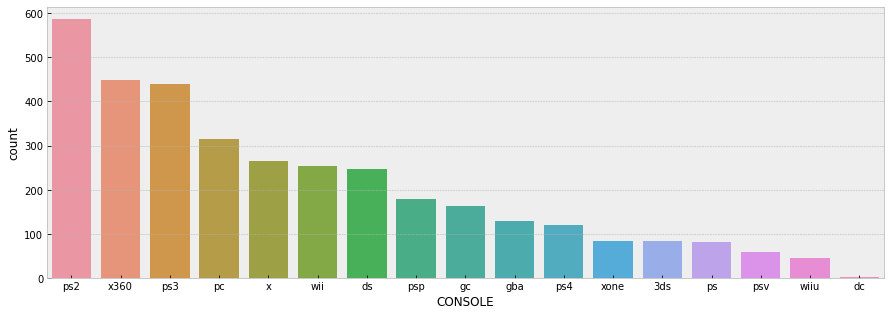

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(train['CONSOLE'], order=train['CONSOLE'].value_counts().index);

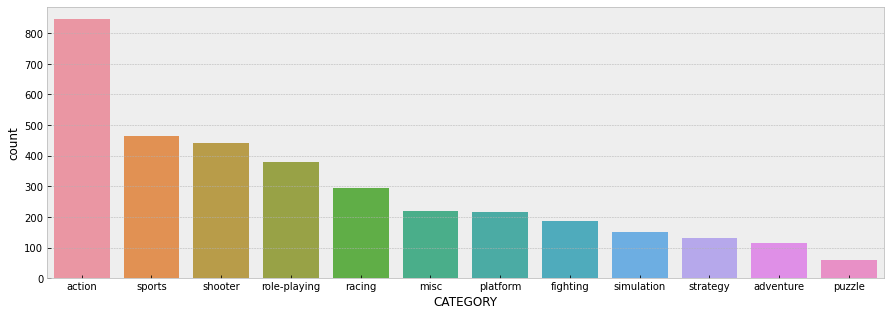

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(train['CATEGORY'], order=train['CATEGORY'].value_counts().index);

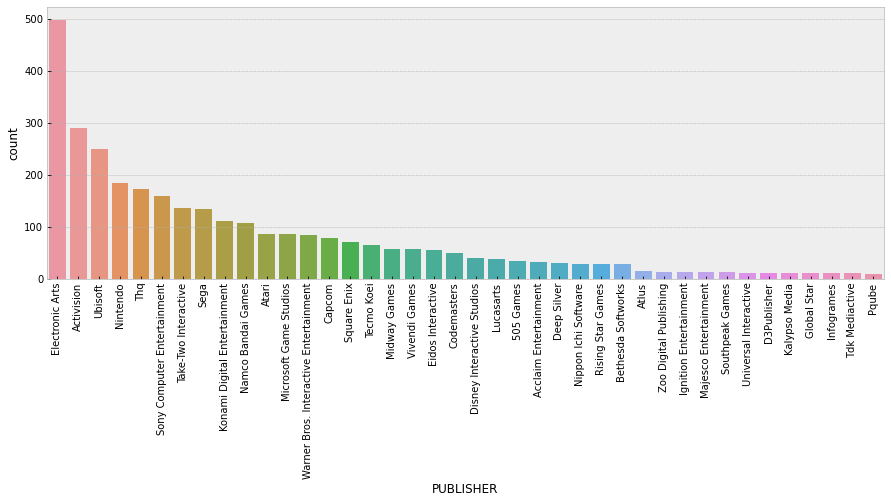

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(train['PUBLISHER'], order=train['PUBLISHER'].value_counts().iloc[:40].index)
plt.xticks(rotation=90);

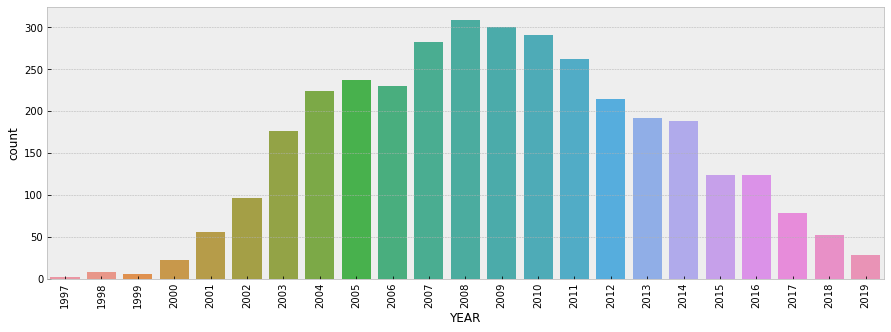

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(train['YEAR'])
plt.xticks(rotation=90);

# Bi-variate Analysis

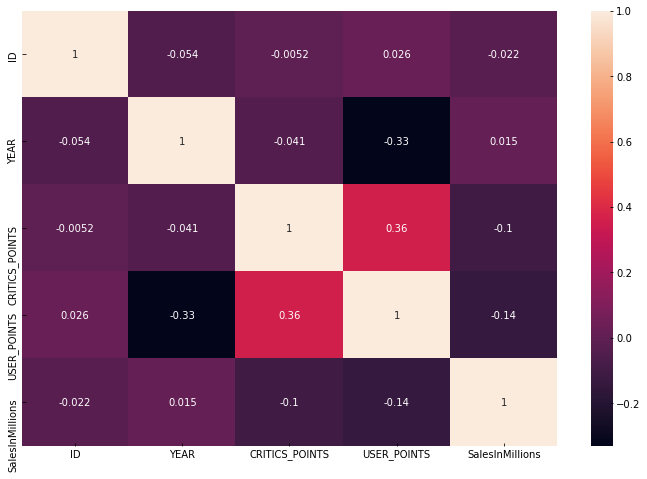

In [15]:
plt.figure(figsize=(12, 8))

train_corr = train.corr()
sns.heatmap(train_corr, 
            xticklabels = train_corr.columns.values,
            yticklabels = train_corr.columns.values,
            annot = True);

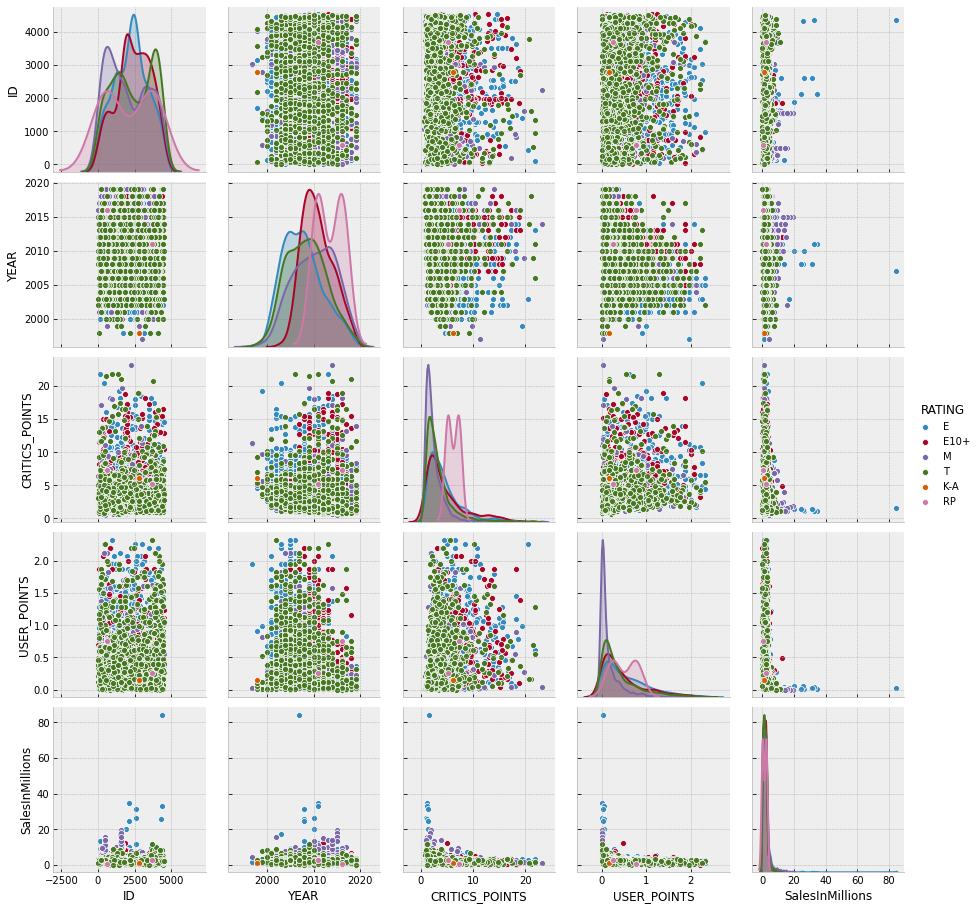

In [16]:
sns.pairplot(train, hue='RATING', diag_kind='kde');

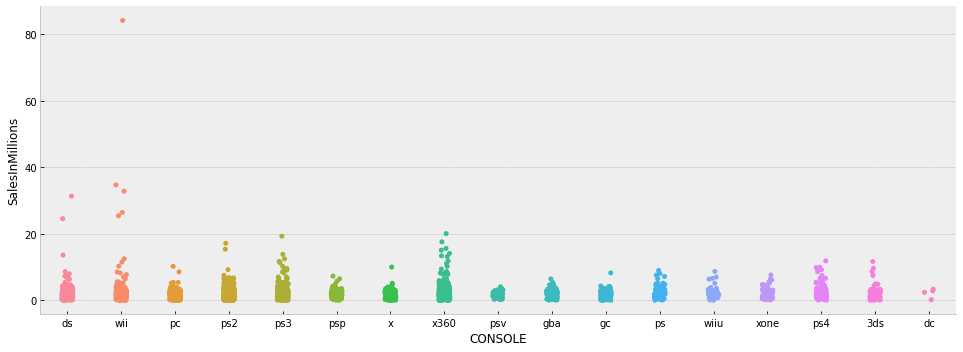

In [17]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", data=train);
g.fig.set_size_inches(15,5)

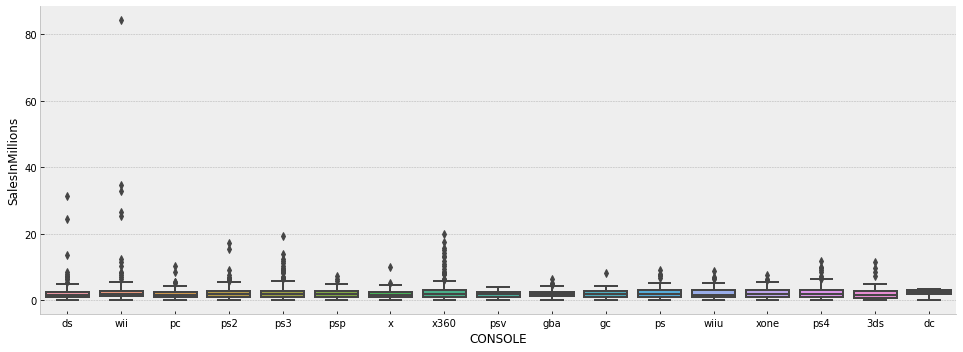

In [18]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", kind="box", data=train)
g.fig.set_size_inches(15,5);

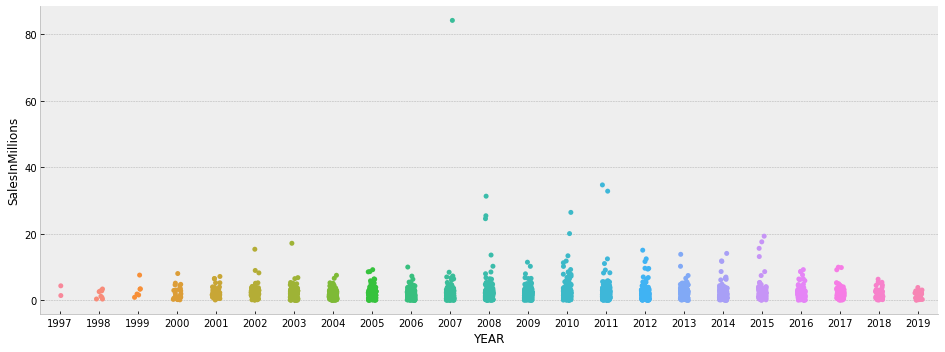

In [19]:
g = sns.catplot(x="YEAR", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

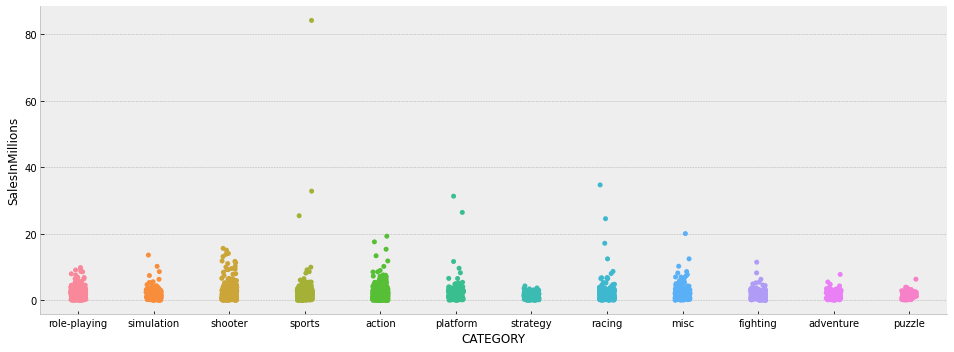

In [20]:
g = sns.catplot(x="CATEGORY", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

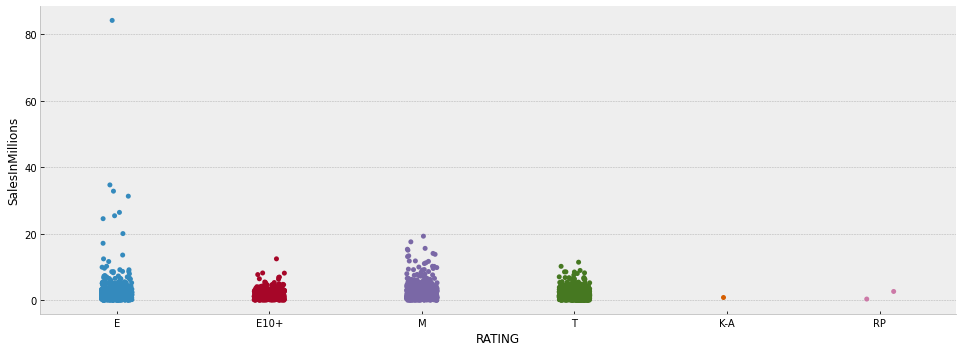

In [21]:
g = sns.catplot(x="RATING", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

In [22]:
train['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [23]:
test['RATING'].value_counts()

T       530
E       457
M       321
E10+    194
AO        1
Name: RATING, dtype: int64

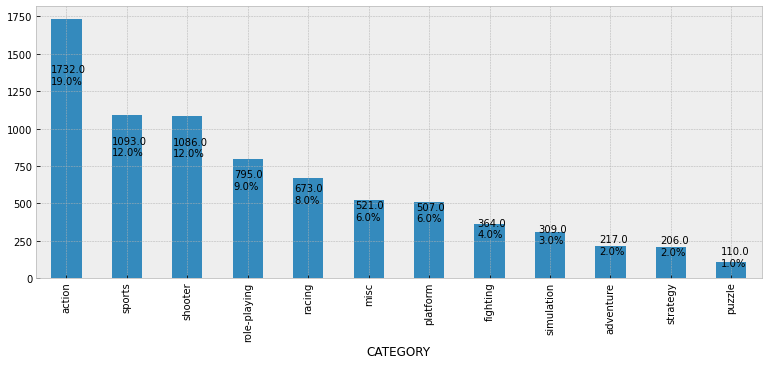

In [24]:
x = train.groupby(['CATEGORY']).sum().copy()
ax = x['SalesInMillions'].sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

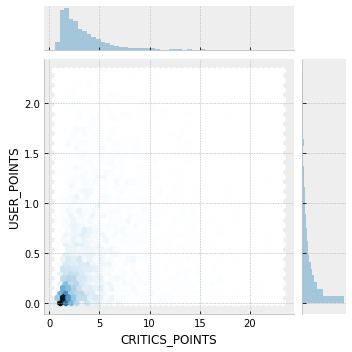

In [25]:
sns.jointplot(x='CRITICS_POINTS',y='USER_POINTS',data=train, kind='hex', size=5);

# Feature Engineering & Pre-processing

In [26]:
train = train[train['RATING'] != 'RP']
train = train[train['RATING'] != 'K-A']

In [27]:
train = train[train['SalesInMillions'] < 30]

In [28]:
df = train.append(test,ignore_index=True)
df.shape

(5002, 9)

In [29]:
df.head(3)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402


In [30]:
agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CONSOLE').agg(agg_func)
agg_func.columns = [ 'CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CONSOLE'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CATEGORY').agg(agg_func)
agg_func.columns = [ 'CATEGORY_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CATEGORY'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('PUBLISHER').agg(agg_func)
agg_func.columns = [ 'PUBLISHER_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['PUBLISHER'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('RATING').agg(agg_func)
agg_func.columns = [ 'RATING_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['RATING'], how='left')

In [31]:
#df['Old'] = 2020 - df['YEAR']

In [32]:
df['Unique_CATEGORY_per_CONSOLE'] = df.groupby(['CONSOLE'])['CATEGORY'].transform('nunique')

In [33]:
calc = df.groupby(['CONSOLE'], axis=0).agg({'CONSOLE':[('op1', 'count')]}).reset_index() 
calc.columns = ['CONSOLE','CONSOLE Count']
df = df.merge(calc, on=['CONSOLE'], how='left')

calc = df.groupby(['CATEGORY'], axis=0).agg({'CATEGORY':[('op1', 'count')]}).reset_index() 
calc.columns = ['CATEGORY','CATEGORY Count']
df = df.merge(calc, on=['CATEGORY'], how='left')

calc = df.groupby(['PUBLISHER'], axis=0).agg({'PUBLISHER':[('op1', 'count')]}).reset_index() 
calc.columns = ['PUBLISHER','PUBLISHER Count']
df = df.merge(calc, on=['PUBLISHER'], how='left')

calc = df.groupby(['RATING'], axis=0).agg({'RATING':[('op1', 'count')]}).reset_index() 
calc.columns = ['RATING','RATING Count']
df = df.merge(calc, on=['RATING'], how='left')

In [34]:
for c in ['ID', 'CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING']:
    df[c] = df[c].astype('category')

In [35]:
#df.drop('ID', axis=1, inplace=True)

In [36]:
agg_func = {
    'CRITICS_POINTS': ['mean','sum']   
}
agg_func = df.groupby(['YEAR','CONSOLE']).agg(agg_func)
agg_func.columns = [ 'YEAR_CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['YEAR','CONSOLE'], how='left')

In [37]:
# 7th Gen: Playstation 3 vs XBOX360 vs Nintendo Wii
# 8th Gen: Playstation 4 vs XBOXONE vs Nintendo WiiU

def check_if_latest(console):
    if console in ['ps3','x360','wii','ps4','xone','wiiu']:
        return 1
    else:
        return 0    

df['LATEST'] = df['CONSOLE'].apply(check_if_latest)

In [38]:
train_df = df[df['SalesInMillions'].isnull()!=True]
test_df = df[df['SalesInMillions'].isnull()==True]
test_df.drop(['SalesInMillions'], axis=1, inplace=True)

In [39]:
X = train_df.drop(labels=['SalesInMillions'], axis=1)
y = train_df['SalesInMillions'].values

X.shape, y.shape

((3499, 48), (3499,))

In [40]:
X.head(3)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,CONSOLE_CRITICS_POINTS_mean,CONSOLE_CRITICS_POINTS_min,...,RATING_USER_POINTS_max,RATING_USER_POINTS_sum,Unique_CATEGORY_per_CONSOLE,CONSOLE Count,CATEGORY Count,PUBLISHER Count,RATING Count,YEAR_CONSOLE_CRITICS_POINTS_mean,YEAR_CONSOLE_CRITICS_POINTS_sum,LATEST
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,4.440908,1.014286,...,2.375,839.851541,12,338,510,247,1514,4.015551,269.041923,0
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,4.321977,0.873418,...,2.325,322.726985,12,364,222,162,705,4.557810,191.428022,1
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,4.120763,0.846154,...,2.200,188.092307,12,459,621,397,1070,6.931070,27.724279,0


In [41]:
from math import sqrt 
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [42]:
Xtest = test_df

In [43]:
errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=2019)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 2500,
         'num_leaves': 20,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.9,
         'bagging_freq': 1,
         'feature_fraction': 0.9,
         'early_stopping_round': 100,
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSE LGBM: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

print('\nMean RMSE', np.mean(errlgb,0))

RMSE LGBM:  1.4213179558422029
RMSE LGBM:  2.0423299279918683
RMSE LGBM:  1.524913682072478
RMSE LGBM:  1.298276236778094
RMSE LGBM:  1.5446705019365337
RMSE LGBM:  1.1683418619632575
RMSE LGBM:  1.3641321832276174
RMSE LGBM:  1.1154698430173713
RMSE LGBM:  1.278072756382377
RMSE LGBM:  1.4150580420085541
RMSE LGBM:  1.396376588817257
RMSE LGBM:  1.894483515029512
RMSE LGBM:  1.7033193443326922
RMSE LGBM:  1.2890491665968962
RMSE LGBM:  1.6922050362321008

Mean RMSE 1.4765344428152538


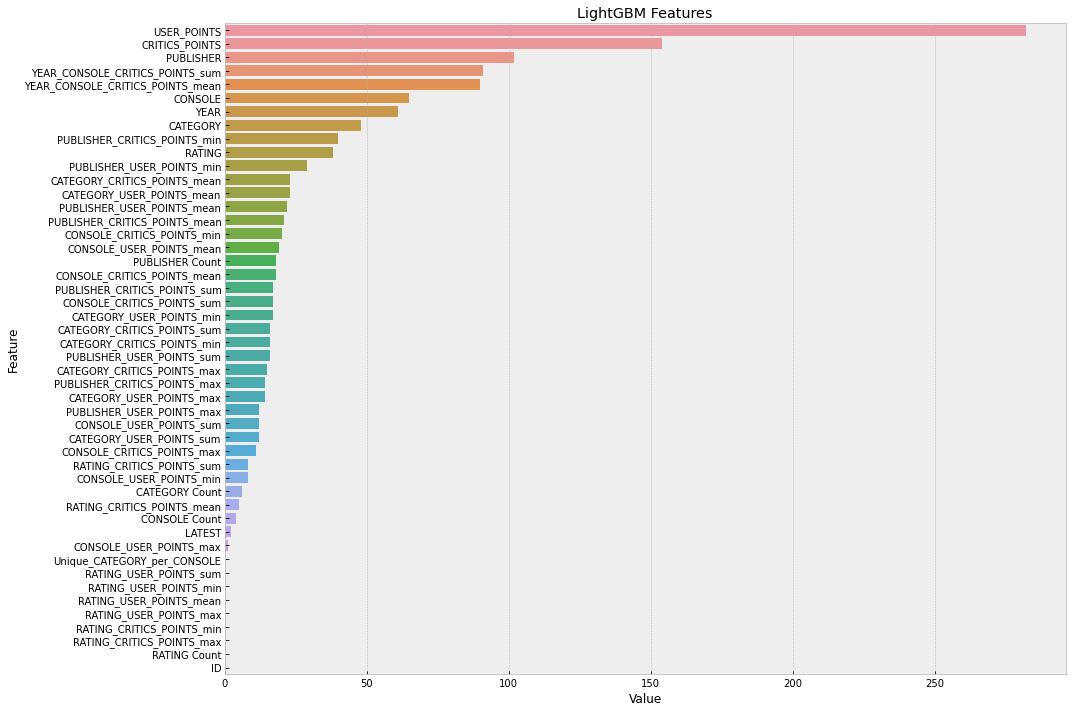

In [44]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X.columns), reverse=True)[:], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [45]:
final_lgb = np.mean(y_pred_totlgb,0)

In [46]:
sub['SalesInMillions'] = final_lgb

In [47]:
sub.head()

,SalesInMillions
0,1.877125
1,2.256681
2,3.190507
3,1.895454
4,1.759797


In [48]:
sub.to_csv('Submission.csv', index=False)